In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
%matplotlib inline
df_bloodLvls = pd.read_csv("BloodLevels.csv")

In [3]:
df_bloodLvls.describe()

,geo_area_id,borough_id,time_period,Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number Tested,Children under 6 years with elevated blood lead levels (BLL) Number Tested _NOTES,"Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=5 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=10 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=15 µg/dL per 1,000 tested"
count,576.000000,564.000000,576.000000,576.000000,576.000000,576.000000,576.000000,0.0,576.000000,576.000000,576.000000
mean,252.708333,2.851064,2010.500000,1016.967014,99.234375,34.130208,20071.180556,NaN,46.913542,4.418403,1.484549
std,149.094653,1.255531,3.455053,3127.307541,274.841442,93.393634,48789.333503,NaN,38.924295,3.128868,1.072739
min,1.000000,1.000000,2005.000000,5.000000,0.000000,0.000000,800.000000,NaN,3.100000,0.000000,0.000000
25%,106.750000,2.000000,2007.750000,109.500000,12.000000,4.000000,4600.000000,NaN,17.675000,2.300000,0.700000
50%,256.000000,3.000000,2010.500000,267.000000,31.000000,11.000000,7500.000000,NaN,32.450000,3.600000,1.300000
75%,402.250000,4.000000,2013.250000,700.250000,68.000000,23.250000,12200.000000,NaN,65.250000,5.600000,1.900000
max,504.000000,5.000000,2016.000000,37344.000000,3082.000000,1014.000000,342900.000000,NaN,182.800000,19.900000,6.000000


In [4]:
df_bloodLvls.head(25)

,geo_type,geo_area_id,geo_area_name,borough_id,time_period,Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number Tested,Children under 6 years with elevated blood lead levels (BLL) Number Tested _NOTES,"Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=5 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=5 µg/dL per 1,000 tested_NOTES","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=10 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=10 µg/dL per 1,000 tested_NOTES","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=15 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=15 µg/dL per 1,000 tested_NOTES"
0,Borough,1,Bronx,1.0,2005,8245,NaN,595,NaN,167,NaN,64500,NaN,127.7,NaN,9.2,NaN,2.6,NaN
1,Borough,1,Bronx,1.0,2006,7272,NaN,474,NaN,144,NaN,67200,NaN,108.2,NaN,7.1,NaN,2.1,NaN
2,Borough,1,Bronx,1.0,2007,6174,NaN,438,NaN,135,NaN,68300,NaN,90.4,NaN,6.4,NaN,2.0,NaN
3,Borough,1,Bronx,1.0,2008,4254,NaN,292,NaN,105,NaN,69800,NaN,60.9,NaN,4.2,NaN,1.5,NaN
4,Borough,1,Bronx,1.0,2009,2742,NaN,278,NaN,103,NaN,70000,NaN,39.2,NaN,4.0,NaN,1.5,NaN
5,Borough,1,Bronx,1.0,2010,2625,NaN,290,NaN,101,NaN,70100,NaN,37.5,NaN,4.1,NaN,1.4,NaN
6,Borough,1,Bronx,1.0,2011,1996,NaN,231,NaN,75,NaN,70100,NaN,28.5,NaN,3.3,NaN,1.1,NaN
7,Borough,1,Bronx,1.0,2012,1396,NaN,184,NaN,81,NaN,66800,NaN,20.9,NaN,2.8,NaN,1.2,NaN
8,Borough,1,Bronx,1.0,2013,1312,NaN,193,NaN,74,NaN,65300,NaN,20.1,NaN,3.0,NaN,1.1,NaN
9,Borough,1,Bronx,1.0,2014,1186,NaN,177,NaN,68,NaN,63400,NaN,18.7,NaN,2.8,NaN,1.1,NaN


In [5]:
unique_cities = list(set(df_bloodLvls["geo_area_name"]))
forbidden_cities = ["Bronx", "Brooklyn", "New York City", "Queens", "Staten Island"]
unique_cities
for j in unique_cities:
    if j in forbidden_cities:
        unique_cities.remove(j)
    else:
        continue
print(unique_cities)

['Southeast Queens', 'Bedford Stuyvesant - Crown Heights', 'Hunts Point - Mott Haven', 'Williamsburg - Bushwick', 'East Harlem', 'Upper West Side', 'Canarsie - Flatlands', 'Sunset Park', 'West Queens', 'Upper East Side', 'Manhattan', 'Union Square - Lower East Side', 'Ridgewood - Forest Hills', 'Lower Manhattan', 'Washington Heights', 'Chelsea - Clinton', 'Rockaways', 'East New York', 'High Bridge - Morrisania', 'Greenpoint', 'Pelham - Throgs Neck', 'Fordham - Bronx Pk', 'Fresh Meadows', 'Bayside - Little Neck', 'Jamaica', 'Willowbrook', 'Central Harlem - Morningside Heights', 'Bensonhurst - Bay Ridge', 'Coney Island - Sheepshead Bay', 'Southwest Queens', 'Crotona -Tremont', 'Northeast Bronx', 'Stapleton - St. George', 'East Flatbush - Flatbush', 'Greenwich Village - SoHo', 'South Beach - Tottenville', 'Kingsbridge - Riverdale', 'Gramercy Park - Murray Hill', 'Downtown - Heights - Slope', 'Long Island City - Astoria', 'Flushing - Clearview', 'Port Richmond', 'Borough Park']


In [6]:
averages_List = []
new_avgs = []
def avgs(loc):
    total = 0
    curNum = -1
    countList = []
    for i in df_bloodLvls["geo_area_name"]:
        curNum += 1
        if df_bloodLvls["geo_area_name"][curNum] == loc:
            total += df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum]
            countList.append(df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum])
        else:
            continue
    averages_List.append(total/12)
    new_avgs.append(total/12)
    return total/12, countList
        
    

In [7]:
for x in unique_cities:
    print(x, avgs(x))
    


Southeast Queens (8.333333333333334, [12, 9, 9, 7, 4, 6, 8, 5, 13, 17, 4, 6])
Bedford Stuyvesant - Crown Heights (34.333333333333336, [16, 42, 81, 21, 12, 26, 22, 17, 52, 26, 69, 28])
Hunts Point - Mott Haven (9.416666666666666, [9, 4, 11, 16, 4, 9, 5, 15, 15, 10, 12, 3])
Williamsburg - Bushwick (28.916666666666668, [12, 27, 41, 17, 70, 30, 21, 15, 32, 47, 15, 20])
East Harlem (5.333333333333333, [2, 9, 6, 6, 4, 3, 8, 5, 7, 6, 2, 6])
Upper West Side (3.8333333333333335, [4, 1, 3, 7, 4, 7, 3, 2, 6, 0, 6, 3])
Canarsie - Flatlands (6.0, [15, 2, 3, 9, 6, 2, 5, 17, 3, 2, 2, 6])
Sunset Park (12.416666666666666, [6, 7, 8, 15, 6, 19, 11, 26, 16, 15, 10, 10])
West Queens (45.916666666666664, [42, 17, 40, 67, 44, 53, 80, 21, 19, 21, 63, 84])
Upper East Side (2.1666666666666665, [0, 0, 1, 5, 2, 3, 5, 0, 0, 1, 8, 1])
Manhattan (44.666666666666664, [85, 92, 52, 55, 39, 45, 48, 32, 27, 20, 19, 22])
Union Square - Lower East Side (4.25, [0, 9, 2, 4, 5, 2, 1, 2, 4, 12, 4, 6])
Ridgewood - Forest Hills 

In [8]:
for p in new_avgs:
    if p == 546.0833333333334:
        new_avgs.remove(p)
        
print(new_avgs)

[8.333333333333334, 34.333333333333336, 9.416666666666666, 28.916666666666668, 5.333333333333333, 3.8333333333333335, 6.0, 12.416666666666666, 45.916666666666664, 2.1666666666666665, 44.666666666666664, 4.25, 11.416666666666666, 0.9166666666666666, 16.25, 1.9166666666666667, 6.333333333333333, 21.916666666666668, 16.916666666666668, 15.166666666666666, 14.25, 25.833333333333332, 3.5833333333333335, 0.75, 26.0, 1.25, 7.833333333333333, 13.583333333333334, 21.25, 24.416666666666668, 16.916666666666668, 12.75, 8.583333333333334, 29.083333333333332, 1.1666666666666667, 1.9166666666666667, 2.6666666666666665, 1.0, 11.75, 12.5, 8.333333333333334, 7.25, 41.666666666666664]


In [9]:
list_05 = []
list_06 = []
list_07 = []
list_08 = []
list_09 = []
list_10 = []
list_11 = []
list_12 = []
list_13 = []
list_14 = []
list_15 = []
list_16 = []
def points(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                list_09.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16.append(df_bloodLvls[column][curNum])

                
list_05_10 = []
list_06_10 = []
list_07_10 = []
list_08_10 = []
list_09_10 = []
list_10_10 = []
list_11_10 = []
list_12_10 = []
list_13_10 = []
list_14_10 = []
list_15_10 = []
list_16_10 = []
def points2(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_09_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16_10.append(df_bloodLvls[column][curNum])
                
list_05_100 = []
list_06_100 = []
list_07_100 = []
list_08_100 = []
list_09_100 = []
list_10_100 = []
list_11_100 = []
list_12_100 = []
list_13_100 = []
list_14_100 = []
list_15_100 = []
list_16_100 = []
def points3(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_09_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16_100.append(df_bloodLvls[column][curNum])

In [10]:
points("Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL")
avg_05 = np.mean(list_05)
avg_06 = np.mean(list_06)
avg_07 = np.mean(list_07)
avg_08 = np.mean(list_08)
avg_09 = np.mean(list_09)
avg_10 = np.mean(list_10)
avg_11 = np.mean(list_11)
avg_12 = np.mean(list_12)
avg_13 = np.mean(list_13)
avg_14 = np.mean(list_14)
avg_15 = np.mean(list_15)
avg_16 = np.mean(list_16)

timeSeries = [avg_05, avg_06, avg_07, avg_08, avg_09, avg_10, avg_11, avg_12, avg_13, avg_14, avg_15, avg_16]
years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

points2("Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL")
avg_05_10 = np.mean(list_05_10)
avg_06_10 = np.mean(list_06_10)
avg_07_10 = np.mean(list_07_10)
avg_08_10 = np.mean(list_08_10)
avg_09_10 = np.mean(list_09_10)
avg_10_10 = np.mean(list_10_10)
avg_11_10 = np.mean(list_11_10)
avg_12_10 = np.mean(list_12_10)
avg_13_10 = np.mean(list_13_10)
avg_14_10 = np.mean(list_14_10)
avg_15_10 = np.mean(list_15_10)
avg_16_10 = np.mean(list_16_10)

timeSeries_10 = [avg_05_10, avg_06_10, avg_07_10, avg_08_10, avg_09_10, avg_10_10, avg_11_10, avg_12_10, avg_13_10, avg_14_10, avg_15_10, avg_16_10]

points3("Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL")
avg_05_100 = np.mean(list_05_100)
avg_06_100 = np.mean(list_06_100)
avg_07_100 = np.mean(list_07_100)
avg_08_100 = np.mean(list_08_100)
avg_09_100 = np.mean(list_09_100)
avg_10_100 = np.mean(list_10_100)
avg_11_100 = np.mean(list_11_100)
avg_12_100 = np.mean(list_12_100)
avg_13_100 = np.mean(list_13_100)
avg_14_100 = np.mean(list_14_100)
avg_15_100 = np.mean(list_15_100)
avg_16_100 = np.mean(list_16_100)

timeSeries_100 = [avg_05_100, avg_06_100, avg_07_100, avg_08_100, avg_09_100, avg_10_100, avg_11_100, avg_12_100, avg_13_100, avg_14_100, avg_15_100, avg_16_100]










data = {
    
    'BLL>=15':[avg_05, avg_06, avg_07, avg_08, avg_09, avg_10, avg_11, avg_12, avg_13, avg_14, avg_15, avg_16], 
    'BLL>=5':[avg_05_10, avg_06_10, avg_07_10, avg_08_10, avg_09_10, avg_10_10, avg_11_10, avg_12_10, avg_13_10, avg_14_10, avg_15_10, avg_16_10],
    'BLL>=10':[avg_05_100, avg_06_100, avg_07_100, avg_08_100, avg_09_100, avg_10_100, avg_11_100, avg_12_100, avg_13_100, avg_14_100, avg_15_100, avg_16_100],
    'years':[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]



} 

df_timeSeries = pd.DataFrame(data)


In [11]:
df_timeSeries.head(25)

,BLL>=15,BLL>=5,BLL>=10,years
0,25.558140,974.255814,79.162791,2005
1,23.720930,903.674419,70.465116,2006
2,18.534884,793.325581,57.697674,2007
3,15.511628,527.813953,46.325581,2008
4,14.046512,389.069767,39.395349,2009
5,14.209302,351.627907,39.697674,2010
6,11.511628,288.023256,33.534884,2011
7,9.860465,204.837209,26.325581,2012
8,8.186047,181.558140,22.744186,2013
9,8.395349,164.372093,23.883721,2014


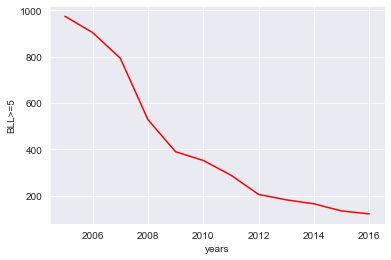

In [13]:
sns.set_style("darkgrid")
sns.lineplot(x="years", y="BLL>=5", color="red", data=df_timeSeries)

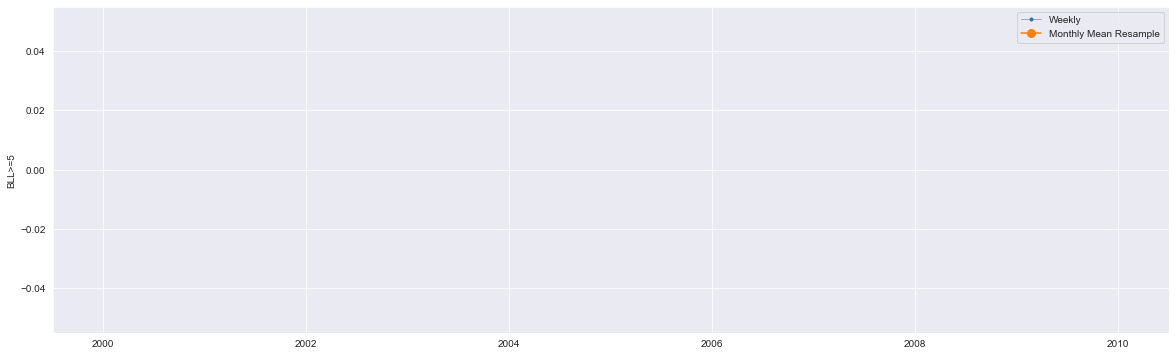

In [18]:
y = df_timeSeries['BLL>=5']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('BLL>=5')
ax.legend();

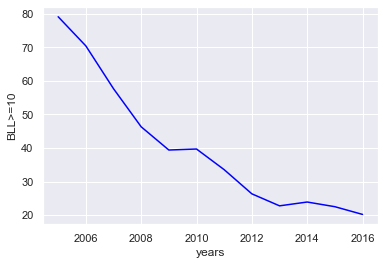

In [39]:
sns.set_style("darkgrid")
sns.lineplot(x="years", y="BLL>=10", color="blue", data=df_timeSeries)

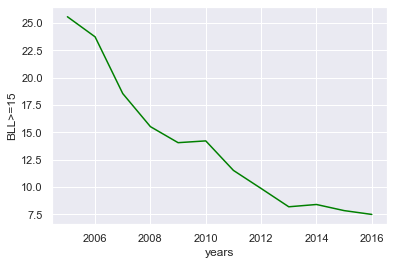

In [40]:
sns.set_style("darkgrid")
sns.lineplot(x="years", y="BLL>=15", color="green", data=df_timeSeries)

[41.666666666666664, 16.916666666666668, 11.416666666666666, 21.25, 0.9166666666666666, 8.333333333333334, 14.25, 44.666666666666664, 0.75, 6.333333333333333, 3.5833333333333335, 15.166666666666666, 1.25, 7.833333333333333, 28.916666666666668, 12.5, 25.833333333333332, 2.6666666666666665, 21.916666666666668, 6.0, 26.0, 11.75, 16.916666666666668, 4.25, 9.416666666666666, 1.1666666666666667, 12.75, 1.9166666666666667, 3.8333333333333335, 29.083333333333332, 8.583333333333334, 2.1666666666666665, 34.333333333333336, 24.416666666666668, 8.333333333333334, 16.25, 45.916666666666664, 1.0, 12.416666666666666, 7.25, 13.583333333333334, 1.9166666666666667, 5.333333333333333]


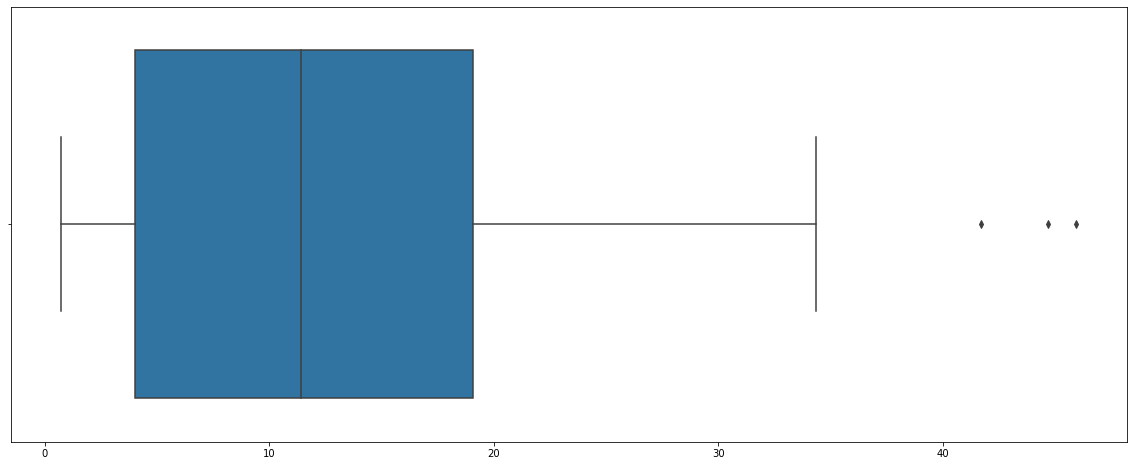

In [14]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x=new_avgs)
print(averages_List)

In [15]:
# Normalizing Distribution
# pre_avgs = []
# def normalize(loc):
#     total = 0
#     curNum = -1
#     countList = []
#     for i in df_bloodLvls["geo_area_name"]:
#         curNum += 1
#         if df_bloodLvls["geo_area_name"][curNum] == loc:
#             total += df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum]
#             countList.append(df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum])
#         else:
#             continue
#     averages_List.append(total/12)
#     return total, countList

pre_avgs = []
def normalize(location, column):
    curNum = -1
    countList = []
    total = 0
    for city in df_bloodLvls["geo_area_name"]:
        curNum += 1
        if location == city:
            num = df_bloodLvls[column][curNum]/df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number Tested"][curNum]
            total += num
            countList.append(str(num) + " " + str(df_bloodLvls["time_period"][curNum]))
        else:
            continue
    pre_avgs.append(total/12)
    return total/12, countList
    
        

In [16]:
for x in unique_cities:
    print(x, normalize(x, "Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL"))
    

Borough Park (0.07705142348711261, ['0.0729113924050633 2010', '0.09644444444444444 2008', '0.1305 2007', '0.052485207100591715 2012', '0.062411764705882354 2011', '0.0350609756097561 2016', '0.03476470588235294 2015', '0.12808333333333333 2005', '0.13949579831932774 2006', '0.04588235294117647 2013', '0.04105263157894737 2014', '0.08552447552447552 2009'])
Crotona -Tremont (0.04940533210902779, ['0.09033057851239669 2007', '0.04016528925619835 2009', '0.11235294117647059 2006', '0.017522935779816513 2014', '0.13575221238938054 2005', '0.02280701754385965 2012', '0.015092592592592593 2015', '0.0365546218487395 2010', '0.013300970873786408 2016', '0.01892857142857143 2013', '0.028403361344537813 2011', '0.061652892561983474 2008'])
Ridgewood - Forest Hills (0.04210489181076113, ['0.04193181818181818 2009', '0.015473684210526317 2015', '0.08049382716049383 2007', '0.013695652173913043 2016', '0.053863636363636364 2008', '0.029690721649484535 2011', '0.01757894736842105 2014', '0.01604166

Southeast Queens (0.04234444855628685, ['0.08825396825396825 2006', '0.019193548387096773 2012', '0.043787878787878785 2009', '0.014098360655737704 2015', '0.03742424242424242 2010', '0.07725806451612903 2007', '0.01557377049180328 2013', '0.015901639344262294 2014', '0.05492307692307692 2008', '0.09861538461538462 2005', '0.03 2011', '0.01310344827586207 2016'])
Washington Heights (0.04115177487791311, ['0.027 2010', '0.08540540540540541 2007', '0.031376146788990825 2009', '0.016464646464646463 2013', '0.015157894736842105 2014', '0.016886792452830188 2012', '0.05580357142857143 2008', '0.008902439024390243 2016', '0.024017857142857143 2011', '0.10177570093457944 2005', '0.011477272727272727 2015', '0.09955357142857142 2006'])
West Queens (0.04923491723974644, ['0.044420600858369096 2009', '0.02111607142857143 2014', '0.022606837606837606 2012', '0.0428448275862069 2010', '0.03264957264957265 2011', '0.06268398268398269 2008', '0.11018867924528301 2006', '0.020043668122270743 2013', '

In [17]:
post_avgs = [num*100 for num in pre_avgs]
pre_avgs

data_perc = {'percentage':[0.04281228405989632,
 0.04940533210902779,
 0.04627197047432429,
 0.03056250322882549,
 0.0411019923647798,
 0.01576363391479021,
 0.04620347707715849,
 0.04234444855628685,
 0.029892926263853356,
 0.033445533024480396,
 0.07039073628676763,
 0.04638345634548972,
 0.04923491723974644,
 0.054181035266727205,
 0.047569084409144896,
 0.03300647999212133,
 0.05507983887378625,
 0.04058442861461437,
 0.039942472508327,
 0.04545726297128822,
 0.04303576981006101,
 0.06186094502207349,
 0.04854544053143173,
 0.04854298336130061,
 0.052680896880556355,
 0.05437447315931693,
 0.06756752457933472,
 0.06730336570252518,
 0.0195704988851728,
 0.04210489181076113,
 0.04205963624046144,
 0.05845717068878834,
 0.03524815115440116,
 0.022583257107534224,
 0.0512582517681402,
 0.04115177487791311,
 0.021647527910685808,
 0.05254493817355322,
 0.05227048809857823,
 0.030392793931916757,
 0.10856332753520498,
 0.05325962943357401,
 0.07705142348711261]}
df_perc = pd.DataFrame(data)

In [18]:
pre_avgs

[0.07705142348711261,
 0.04940533210902779,
 0.04210489181076113,
 0.05507983887378625,
 0.03524815115440116,
 0.030392793931916757,
 0.04545726297128822,
 0.04205963624046144,
 0.021647527910685808,
 0.039942472508327,
 0.029892926263853356,
 0.10856332753520498,
 0.0195704988851728,
 0.052680896880556355,
 0.07039073628676763,
 0.04627197047432429,
 0.05325962943357401,
 0.03056250322882549,
 0.06186094502207349,
 0.0411019923647798,
 0.04620347707715849,
 0.05437447315931693,
 0.05227048809857823,
 0.04854544053143173,
 0.047569084409144896,
 0.05845717068878834,
 0.04638345634548972,
 0.04058442861461437,
 0.03300647999212133,
 0.06730336570252518,
 0.04303576981006101,
 0.022583257107534224,
 0.06756752457933472,
 0.04854298336130061,
 0.04234444855628685,
 0.04115177487791311,
 0.04923491723974644,
 0.033445533024480396,
 0.05254493817355322,
 0.0512582517681402,
 0.04281228405989632,
 0.01576363391479021,
 0.054181035266727205]

C:\Users\SAM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


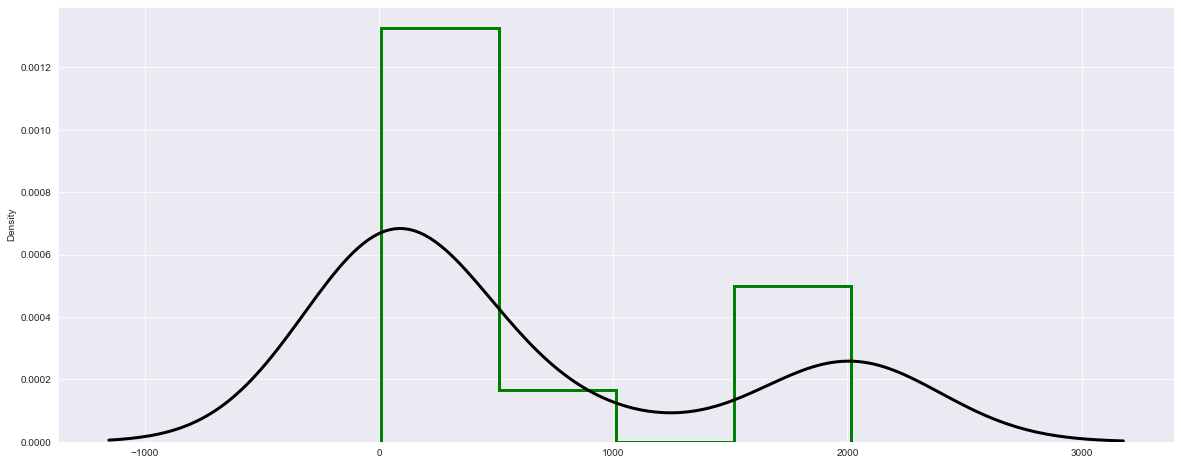

In [19]:
fig_dims = (20, 8)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.distplot(df_perc, rug=False, rug_kws={"color": "g"}, kde_kws={"color": "k", "lw": 3, "label": "KDE"}, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})

In [20]:

unique_cities
df_cities = pd.DataFrame()
df_cities["Neighborhood"] = unique_cities
df_cities.to_excel('result.xlsx', index = False) 


In [21]:
df_povertyRate = pd.read_excel("daby.xlsx")
df_povertyRate

,Neighborhood,% With Lead Risk,Poverty Rate,Median Income,Average Income,Borough,Unnamed: 6,Unnamed: 7
0,Bensonhurst - Bay Ridge,0.017237,20.000,55360.0,74157.00,Brooklyn,NaN,NaN
1,Crotona -Tremont,0.013301,37.700,26910.0,NaN,Bronx,NaN,NaN
2,Long Island City - Astoria,0.014000,17.000,65392.0,97379.00,Queens,NaN,NaN
3,Kingsbridge - Riverdale,0.009200,0.278,58551.0,83674.00,Bronx,NaN,NaN
4,Canarsie - Flatlands,0.012754,0.096,67669.0,83059.00,Brooklyn,NaN,NaN
5,South Beach - Tottenville,0.007568,9.300,80361.0,90629.89,Staten Island,NaN,reason for outier is significant water quality...
6,Jamaica,0.017023,13.100,48559.0,76362.00,Queens,NaN,NaN
7,Southeast Queens,0.013103,13.000,72290.0,67190.00,Queens,NaN,NaN
8,Fresh Meadows,0.007632,13.000,66483.0,80815.00,Queens,NaN,NaN
9,Gramercy Park - Murray Hill,0.003333,11.000,115027.0,189311.94,Manhattan,NaN,NaN


C:\Users\SAM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


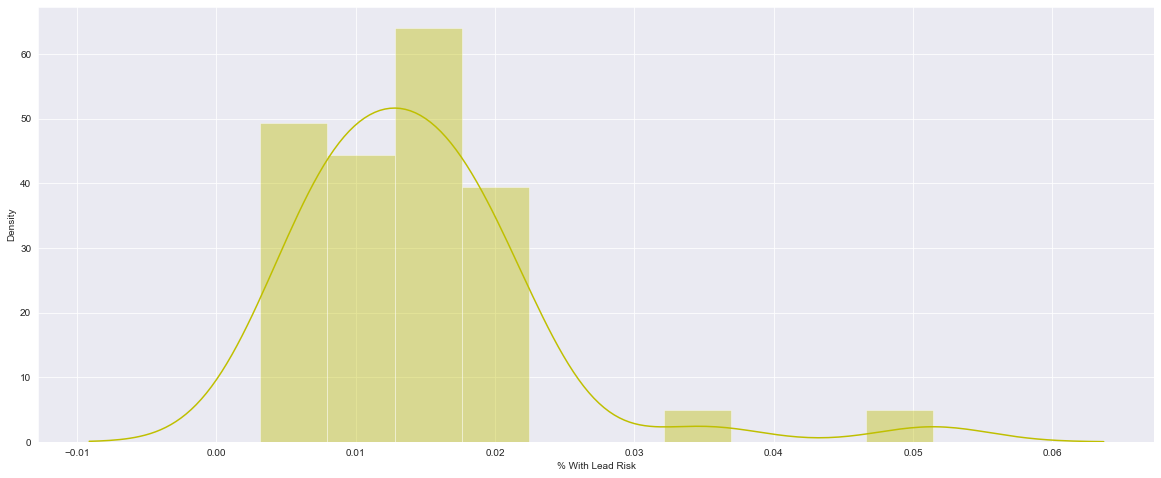

In [22]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.distplot(df_povertyRate["% With Lead Risk"], color="y")

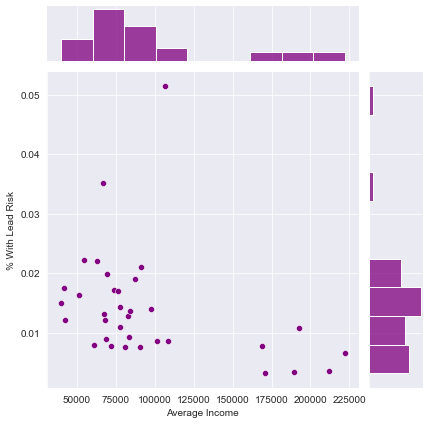

In [23]:
sns.jointplot(x='Average Income',y='% With Lead Risk',data=df_povertyRate,color='purple')

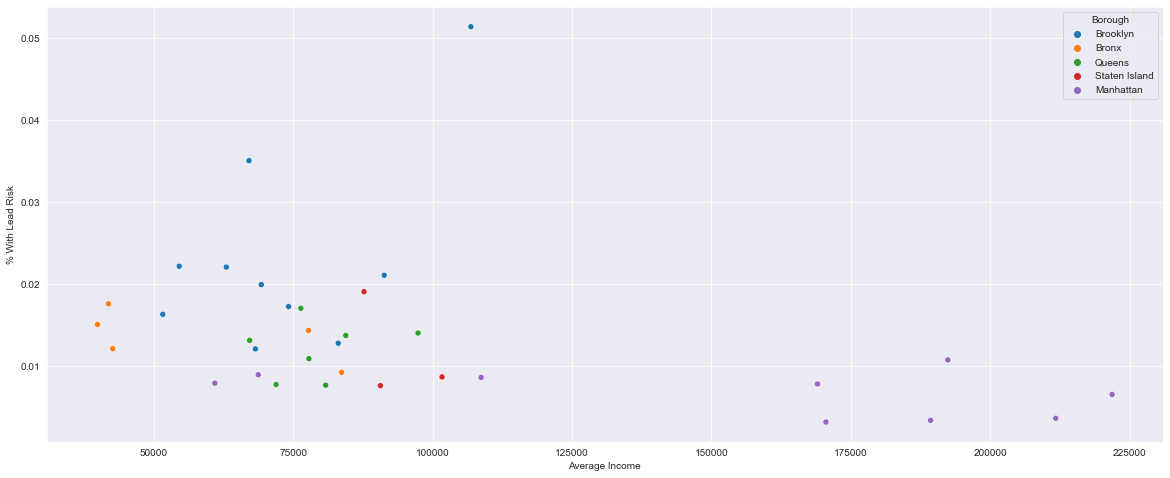

In [24]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Average Income", y="% With Lead Risk", hue="Borough")

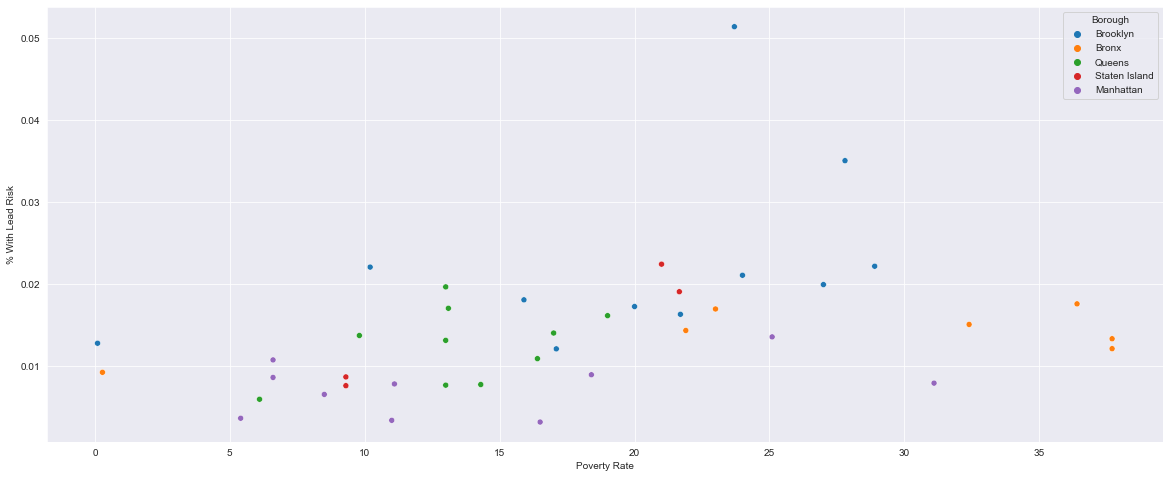

In [25]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Poverty Rate", y="% With Lead Risk", hue="Borough")

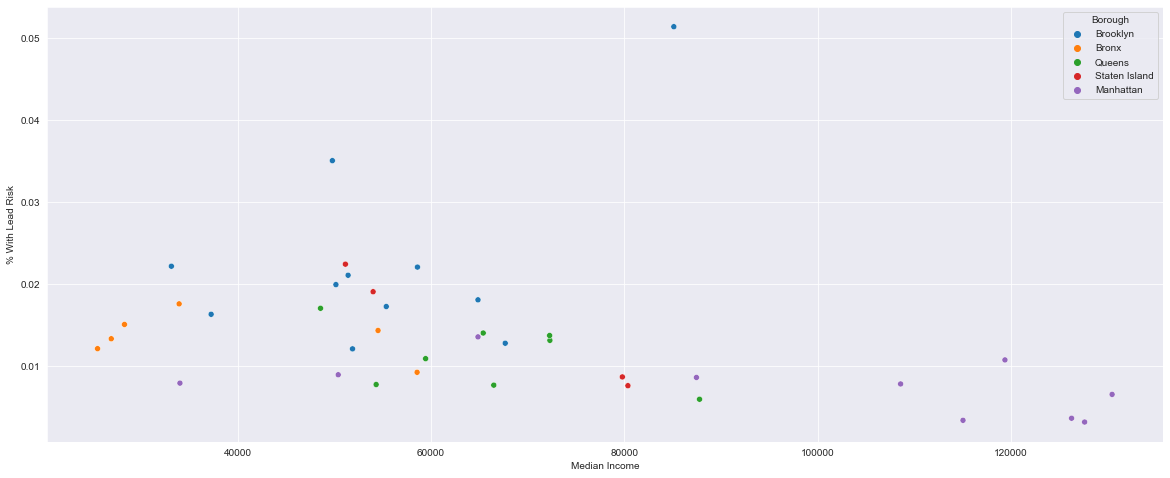

In [26]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Median Income", y="% With Lead Risk", hue="Borough")

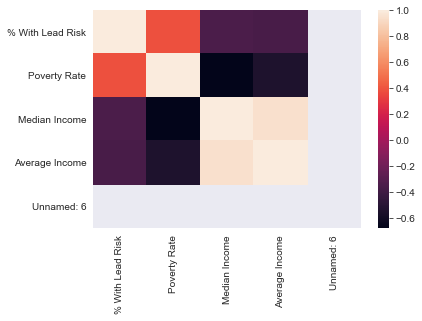

In [27]:

sns.heatmap(df_povertyRate.corr())


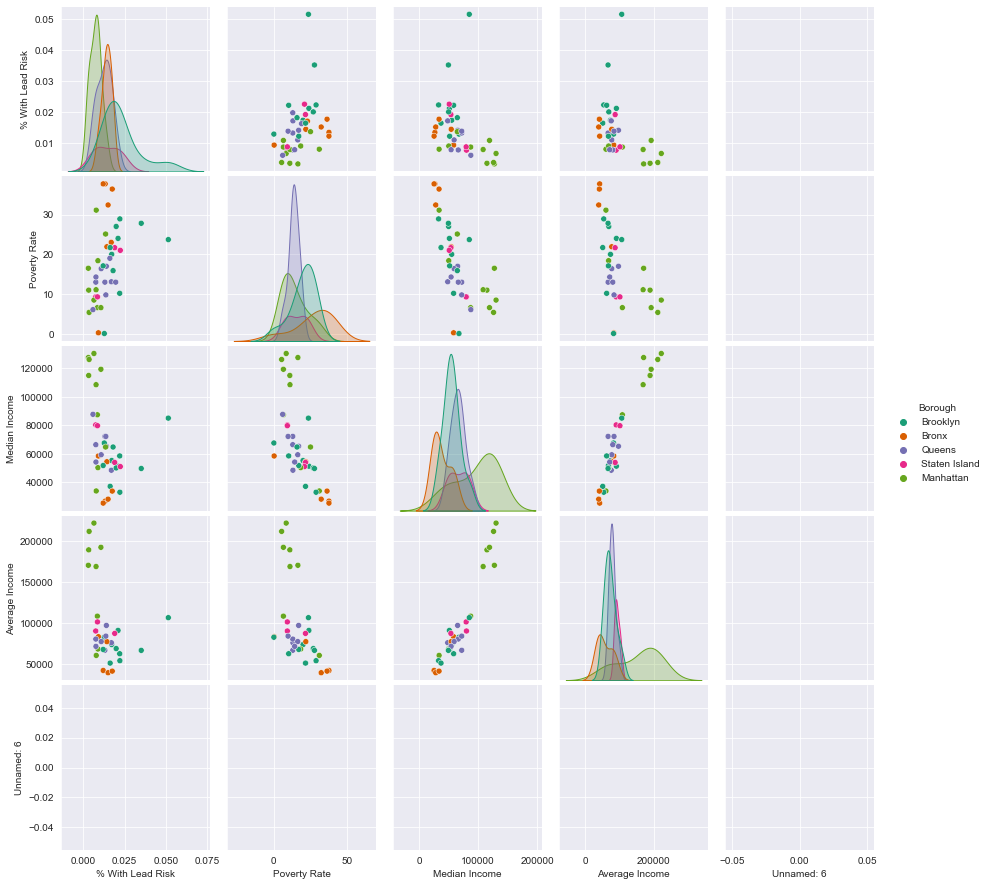

In [28]:
sns.pairplot(df_povertyRate,hue='Borough',palette='Dark2')

In [29]:
import geopandas as gpd
sns.set(style="darkgrid")

In [30]:
nb = 'geo_export_7e724bd2-6b59-45bb-a9ce-4ccfcba60fb3.shp'
regions = gpd.read_file(nb)

In [31]:
regions.sample(100)

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
68,3.0,Brooklyn,047,BK58,Flatlands,5.434178e+07,40635.275342,"POLYGON ((-73.91860 40.63207, -73.91835 40.629..."
139,4.0,Queens,081,QN60,Kew Gardens,2.049257e+07,21440.868182,"POLYGON ((-73.81638 40.70245, -73.81648 40.702..."
110,5.0,Staten Island,085,SI12,Mariner's Harbor-Arlington-Port Ivory-Granitev...,8.950232e+07,71306.752741,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ..."
173,1.0,Manhattan,061,MN19,Turtle Bay-East Midtown,1.738916e+07,21124.053857,"MULTIPOLYGON (((-73.96421 40.74660, -73.96427 ..."
145,4.0,Queens,081,QN62,Queensboro Hill,2.654193e+07,30690.301176,"POLYGON ((-73.81537 40.74722, -73.81477 40.746..."
...,...,...,...,...,...,...,...,...
11,4.0,Queens,081,QN33,Cambria Heights,3.307680e+07,26168.270087,"POLYGON ((-73.72678 40.70306, -73.72673 40.702..."
121,2.0,Bronx,005,BX36,University Heights-Morris Heights,2.125549e+07,24100.432040,"POLYGON ((-73.90487 40.85869, -73.90526 40.858..."
76,1.0,Manhattan,061,MN32,Yorkville,1.360206e+07,17998.720613,"MULTIPOLYGON (((-73.93805 40.78083, -73.93790 ..."
80,1.0,Manhattan,061,MN01,Marble Hill-Inwood,1.773269e+07,31844.409421,"MULTIPOLYGON (((-73.92152 40.85660, -73.92159 ..."


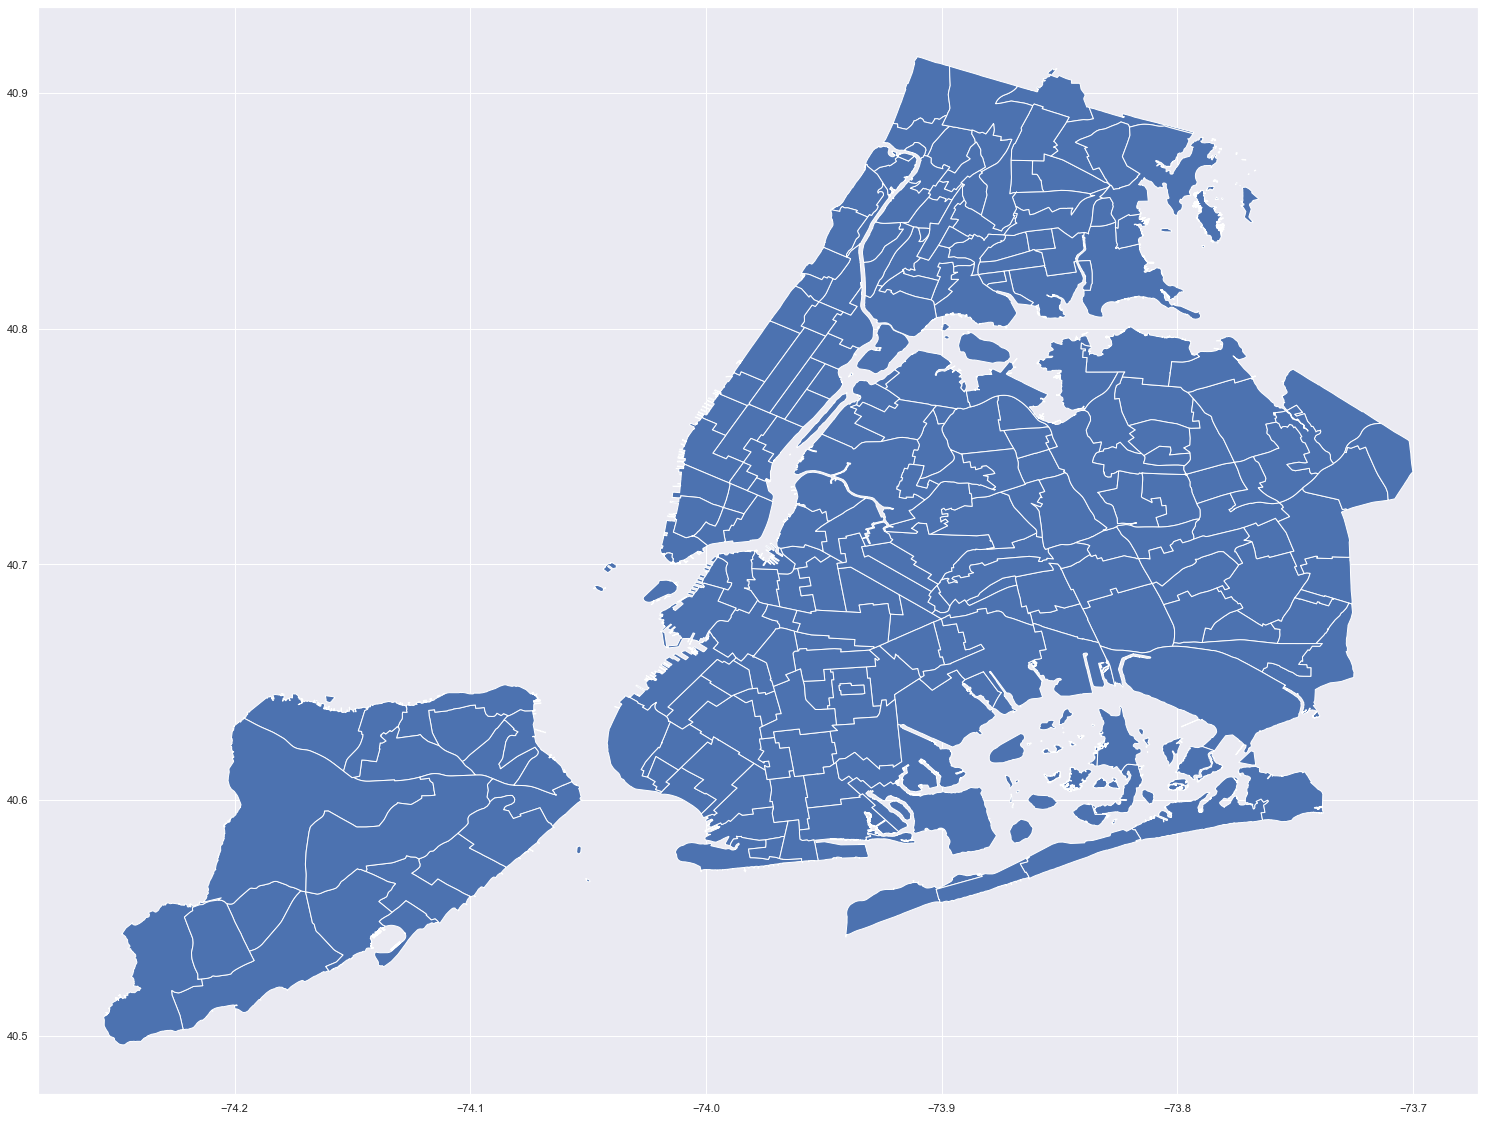

In [32]:
regions.plot(figsize=(40,20))
plt.show()

In [33]:
dab = pd.read_csv("data.csv")

In [34]:
dab.head(10)

,ntaname,Unnamed: 1
0,Borough Park,0.035061
1,Murray Hill,0.007708
2,East Elmhurst,NaN
3,Erasmus,NaN
4,Hollis,NaN
5,Homecrest,NaN
6,Fresh Meadows-Utopia,0.007632
7,Longwood,NaN
8,Midwood,NaN
9,St. Albans,0.013103


In [35]:
merged = regions.set_index('ntaname').join(dab.set_index('ntaname'))
merged = merged.reset_index()
merged[['ntaname', 'shape_area', 'shape_leng', 'geometry', 'Unnamed: 1']].sample(5)

,ntaname,shape_area,shape_leng,geometry,Unnamed: 1
182,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,1.002097e+08,119016.703209,"MULTIPOLYGON (((-73.88347 40.56848, -73.88337 ...",NaN
32,Queensbridge-Ravenswood-Long Island City,2.331703e+07,27067.652533,"POLYGON ((-73.93453 40.77118, -73.93425 40.771...",0.014000
118,Oakland Gardens,5.100968e+07,42410.067713,"POLYGON ((-73.74017 40.73848, -73.74145 40.736...",NaN
112,Central Harlem South,1.443930e+07,16621.023444,"POLYGON ((-73.94177 40.80709, -73.94226 40.806...",0.013529
88,Mount Hope,1.471671e+07,18937.248153,"POLYGON ((-73.89561 40.85457, -73.89662 40.852...",NaN


In [36]:
merged['Unnamed: 1'] = merged['Unnamed: 1'].fillna(0)

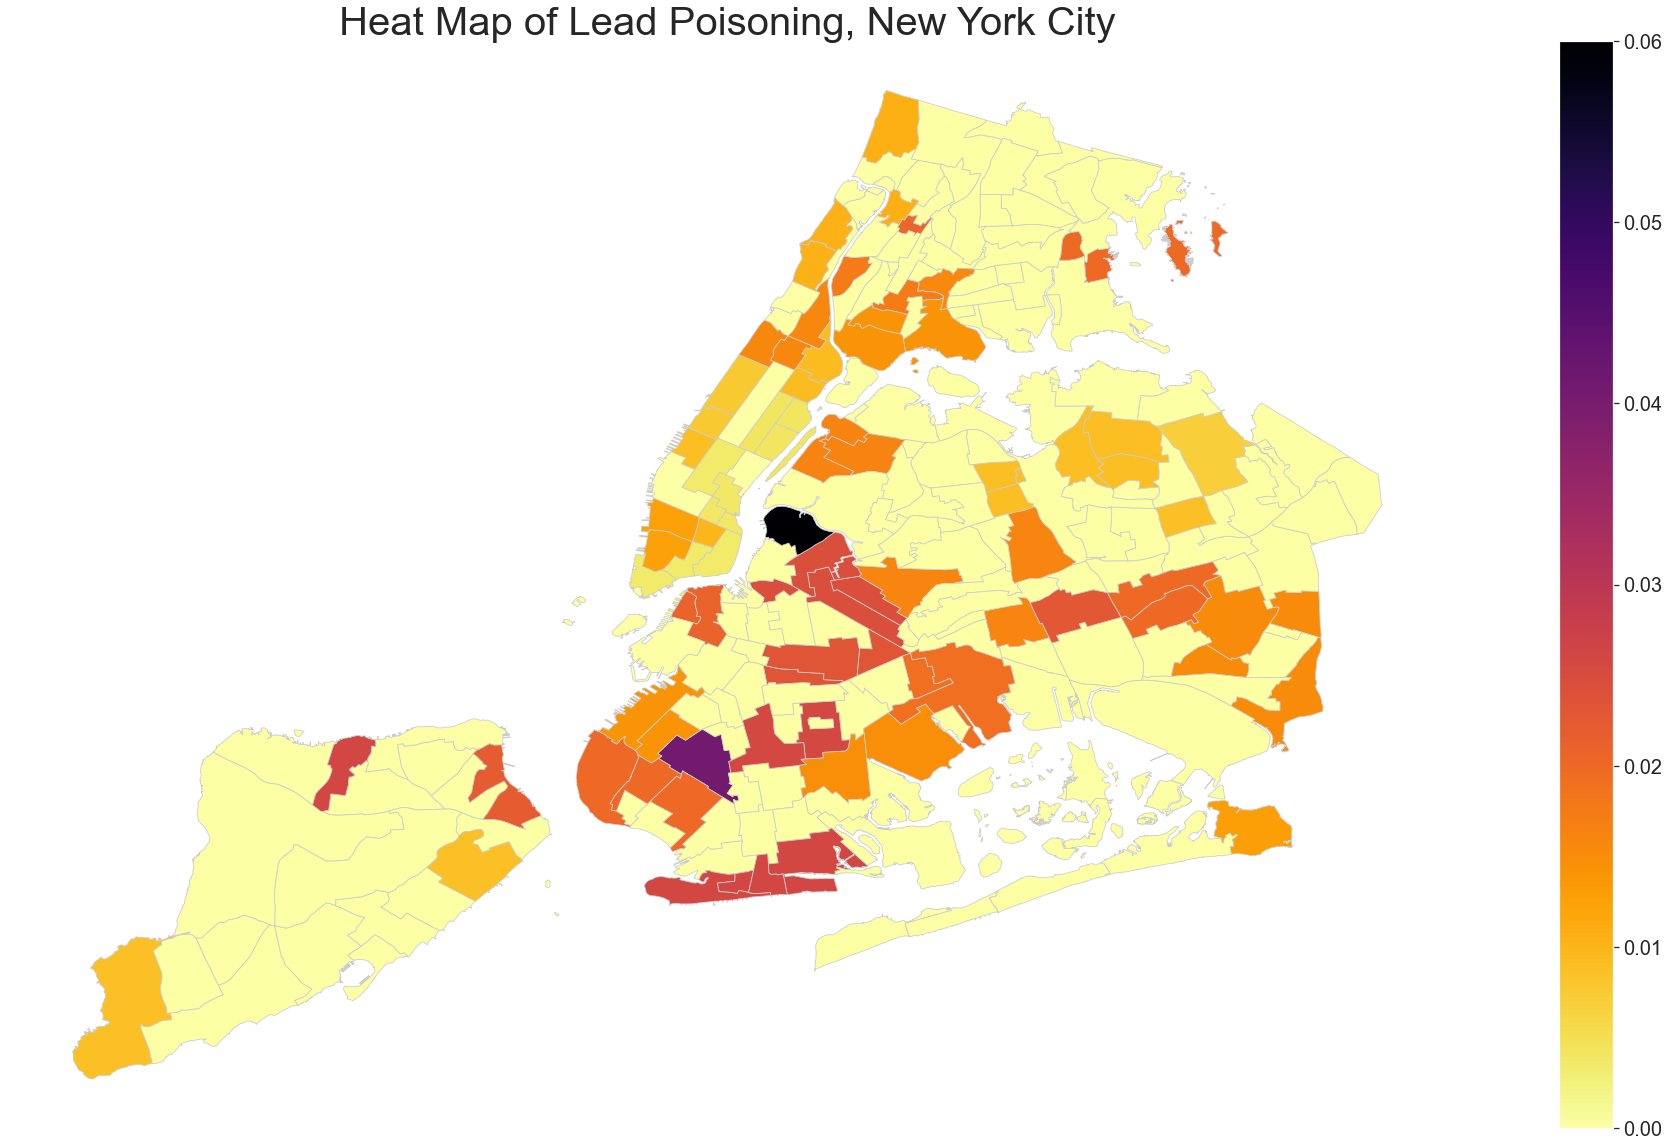

In [37]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Lead Poisoning, New York City', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'inferno_r'
vmin, vmax = 0, 0.06
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

merged.plot('Unnamed: 1', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

In [113]:
import numpy as np
import pandas as pd 
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import time
import datetime
from datetime import datetime, date,timedelta
from scipy import integrate, optimize
from scipy.integrate import odeint
import warnings
warnings.filterwarnings('ignore')

import os

# plotly library
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

#matplot lib
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import ticker

# ML libraries
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import preprocessing, svm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,explained_variance_score
import sklearn 
import matplotlib.dates as dates

import mpld3
mpld3.enable_notebook()
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
matplotlib.style.use('ggplot')
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

In [111]:
# Top 10 countries with Highest Number of Death Rates
fig = px.bar(df_povertyRate.sort_values('% With Lead Risk',ascending=False)[:10][::-1],x='% With Lead Risk',y='Neighborhood',title='Top 10 Countries with highest number of Death Cases',text='Borough',height=900, orientation='h')

#image_bytes = fig.to_image(format='png', , width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
#img_bytes = fig.to_image(format="png")
#instead of using fig.show()
##from IPython.display import Image
#Image(img_bytes)
#fig.show()
plotly.offline.iplot(fig)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

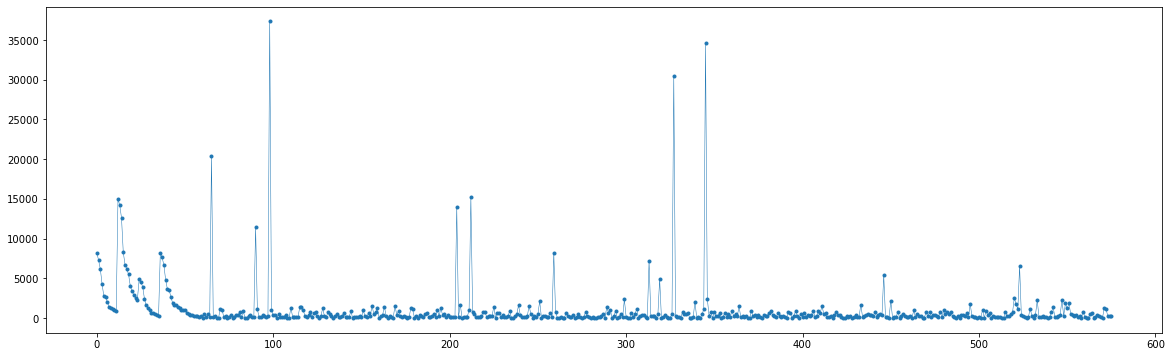

In [7]:


import warnings
import matplotlib.pyplot as plt
y = df_bloodLvls['Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Orders')
ax.legend();